# Cryptocurrency Price Analysis Dataset Overview

Here we will overview and analyze the <a href="http://earthdatascience.org" target="_blank">Cryptocurrency Price</a> dataset, from Kaggle, to assess the investment potential by comparing returns and risk indicators over time, based on the performance records of four cryptocurrencies: Bitcoin (BTC), Ethereum (ETH), Litecoin (LTC) and Ripple (XRP).

In the study "Predicting Future Cryptocurrency Investment Trends" you will find about the importance of predictions in cryptocurrency investment by enabling investors to anticipate market trends, manage risks, make strategic decisions, gain a competitive edge, and maximize investment returns. Predictive analytics tools and techniques play a vital role in supporting informed decision-making and enhancing investment outcomes in the dynamic and rapidly evolving cryptocurrency market.

### 0. Imports

In [1]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from math import pi

#Machine learning library
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

import warnings
warnings.filterwarnings("ignore")

# Import SHAP library for model explainability
import shap

import crypto_price_analysis as cpa

## Introducing the Cryptocurrency Price dataset

### 1.  Analyze the dataset to understand its nature, quality, and properties: 

#### Dataset Profile: 
Each one of the dataset files have those 5 columns:
- Crypto: This column specifies the name of the cryptocurrency (e.g., BTC, ETH, XRP, LTC).
- Date: The date on which the price data was recorded.
- Open: The opening price of the cryptocurrency at the beginning of the day.
- High: The highest price reached by the cryptocurrency during the day.
- Low: The lowest price reached by the cryptocurrency during the day.
- Close: The closing price of the cryptocurrency at the end of the day.

**a. Descriptive Statistics:** </br>
* Calculate basic statistics (mean, median, standard deviation) for each cryptocurrency:

In [2]:
cols = ["Date", "Crypto", "Open", "High", "Low", "Close"]

In [3]:
dtf_for_BTC = pd.read_csv("./Cryptocurrency Price Dataset/BTC.csv", usecols=cols)
dtf_for_BTC = dtf_for_BTC[cols]
dtf_for_BTC.head()

,Date,Crypto,Open,High,Low,Close
0,12/31/19,BTC,7254.0,7309.0,7132.0,7171.0
1,12/30/19,BTC,7402.0,7430.0,7217.0,7254.0
2,12/29/19,BTC,7334.0,7529.0,7295.0,7402.0
3,12/28/19,BTC,7235.0,7359.0,7235.0,7334.0
4,12/27/19,BTC,7208.0,7267.0,7087.0,7235.0


if the mean is substantially higher or lower than the median, it indicates that some values are pulling the mean away from the central tendency.</br> If the mean and median values are relatively close, it suggests a more symmetric distribution.

In [4]:
dtf_for_BTC.describe()

,Open,High,Low,Close
count,1974.000000,1974.000000,1974.000000,1974.000000
mean,20639.256839,21173.736069,20064.781662,20643.867275
std,16391.724861,16828.496642,15900.462608,16390.452205
min,3188.000000,3266.000000,3156.000000,3188.000000
25%,8010.000000,8213.750000,7748.000000,8007.750000
50%,11752.500000,12054.000000,11497.500000,11750.000000
75%,30955.250000,31873.750000,29689.000000,30983.250000
max,67802.000000,68925.000000,66112.000000,67802.000000


We can say comprehensively about all the columns in the Bitcoin dataset that:</br> The mean and median have a substantial difference which suggesting on potential outliers.</br> For further investigation we will use visualizations or statistical methods like Z-scores or IQR that could help identify and handle these extreme values.

In [5]:
dtf_for_ETH = pd.read_csv("./Cryptocurrency Price Dataset/ETH.csv", usecols=cols)
dtf_for_ETH = dtf_for_ETH[cols]
dtf_for_ETH.head()

,Date,Crypto,Open,High,Low,Close
0,12/31/21,ETH,3736.59,3812.67,3622.51,3687.67
1,12/30/21,ETH,3725.60,3768.63,3590.00,3733.98
2,12/29/21,ETH,3809.14,3827.01,3700.00,3724.98
3,12/28/21,ETH,4061.29,4075.97,3765.23,3807.82
4,12/27/21,ETH,4086.36,4128.28,4037.00,4061.30


In [6]:
dtf_for_ETH.describe()

,Open,High,Low,Close
count,1975.000000,1975.000000,1975.000000,1975.000000
mean,1187.961544,1226.940577,1144.599033,1188.435453
std,1164.574631,1200.438606,1123.993771,1164.606959
min,81.720000,84.150000,80.920000,81.720000
25%,215.730000,222.820000,207.525000,215.615000
50%,646.980000,669.000000,618.120000,647.000000
75%,1817.655000,1855.245000,1773.655000,1817.660000
max,4800.000000,4865.810000,4715.510000,4800.000000


For Ethereum dataset, it seems to have a wide distribution with some variability, but the mean and median differences are not extreme.

In [7]:
dtf_for_LTC = pd.read_csv("./Cryptocurrency Price Dataset/LTC.csv", usecols=cols)
dtf_for_LTC = dtf_for_LTC[cols]
dtf_for_LTC.head()

,Date,Crypto,Open,High,Low,Close
0,12/31/22,LTC,67.78,71.04,67.56,70.29
1,12/30/22,LTC,66.08,68.57,66.04,67.78
2,12/29/22,LTC,66.39,67.16,65.58,66.08
3,12/28/22,LTC,68.08,69.37,66.09,66.42
4,12/27/22,LTC,69.92,71.03,67.80,68.08


In [8]:
dtf_for_LTC.describe()

,Open,High,Low,Close
count,1975.000000,1975.000000,1975.000000,1975.000000
mean,98.426248,102.451261,94.191747,98.345600
std,58.750386,62.229616,55.228690,58.674749
min,22.660000,23.470000,22.260000,22.580000
25%,54.745000,56.390000,52.745000,54.765000
50%,78.410000,81.680000,75.600000,78.190000
75%,132.380000,137.100000,125.935000,132.130000
max,373.350000,413.220000,345.760000,373.640000


For Litecoin dataset, based on these observations, there are no apparent extreme values or outliers. </br> The distribution of prices appears to be centered, and there is not a significant difference between the mean and median. This suggests a relatively stable and consistent trend in the cryptocurrency's price over the provided time period.

In [9]:
dtf_for_XPR = pd.read_csv("./Cryptocurrency Price Dataset/XPR.csv", usecols=cols)
dtf_for_XPR = dtf_for_XPR[cols]
dtf_for_XPR.head()

,Date,Crypto,Open,High,Low,Close
0,12/31/22,XRP,0.34,0.34,0.34,0.34
1,12/30/22,XRP,0.34,0.35,0.33,0.34
2,12/29/22,XRP,0.36,0.36,0.34,0.34
3,12/28/22,XRP,0.37,0.37,0.35,0.36
4,12/27/22,XRP,0.37,0.37,0.36,0.37


In [10]:
dtf_for_XPR.describe()

,Open,High,Low,Close
count,1975.000000,1975.000000,1975.000000,1975.000000
mean,0.511838,0.533975,0.487266,0.510729
std,0.333890,0.358062,0.302996,0.330889
min,0.140000,0.150000,0.120000,0.140000
25%,0.290000,0.300000,0.280000,0.290000
50%,0.400000,0.410000,0.380000,0.400000
75%,0.630000,0.660000,0.600000,0.630000
max,2.780000,3.350000,2.550000,2.780000


For the Ripple dataset, it seems to be relatively tight distributions, but there may be some extreme values present, especially at the upper end (as indicated by the maximum values).

### 2. Sanitize and organize dataset:
**a. Handle Missing Data:**

* Check for missing values and decide on an appropriate strategy (imputation, removal, etc.). Handling the missing values of each of the features by imputing them with the average value of the days that are the most closest to them.

In [11]:
dtf_names = ["Bitcoin (BTC)", "Ethereum (ETH)", "Litecoin (LTC)", "Ripple (XRP)"]
dtf_list_miss = [dtf_for_BTC, dtf_for_ETH, dtf_for_LTC, dtf_for_XPR]
dtf_list = cpa.run_impute_missing_values(dtf_list_miss, dtf_names)

### 3. Define a prediction problem:
After examine the datasets and organize it, we will move forward and focus on our **target variable -** <u>close price</u>, that represent the cryptocurrency's value at the end of the daily trading period.
This indicator captures the market sentiment and consensus among traders and investors at the conclusion of each trading day. As a result, it plays a pivotal role in the comprehensive assessment of the overall performance and viability of a cryptocurrency as an investment opportunity.

With this variable we can:
1. **Calculate Daily Returns:** As mentioned earlier, we can calculate the daily percentage change in the close price. This helps to understand the daily performance of the cryptocurrency and can be used to analyze volatility.
2. **Moving Averages:** Use moving averages (such as the simple moving average or exponential moving average) to smooth out price fluctuations and identify trends in the close price.
3. **Relative Strength Index (RSI):** RSI is a momentum oscillator that measures the speed and change of price movements. It can help identify overbought or oversold conditions.

The **prediction problem** will be to assess the investment potential by comparing returns and risk indicators over time based on the performance records of the feature "Close" of those four cryptocurrencies.
This assessment of investment potential involves analysis according to the target variable.

* Examine the distribution of the target variable 'Close' price for each cryptocurrency to identify any outliers:

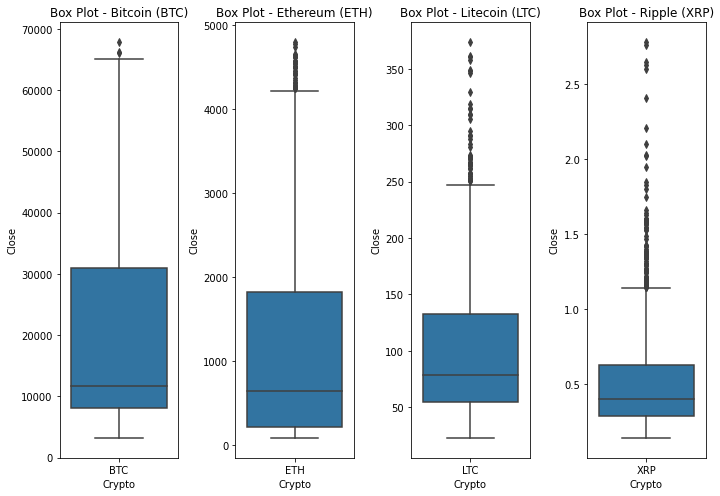

In [12]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(dtf_list), figsize=(10, 7))

# Plot each box plot
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    sns.boxplot(x='Crypto', y='Close', data=dtf, ax=axes[i])
    axes[i].set_title(f'Box Plot - {name}')

plt.tight_layout()
plt.show()

According to the Box plots above, we can see the distribution of the target feature "Close" of each of the four cryptos. The line inside each box represents the median of the dataset of each cryptocurrency and the whiskers extend from the edges of the box to indicate the range of the data. By default, the whiskers extend to the smallest and largest observations within 1.5 times the IQR from the lower and upper quartiles, respectively. Data points beyond the whiskers are considered potential outliers.
We can implies from the plots that Ripple has the most sgnificant outliers (those are the individual data points that fall outside the whiskers).

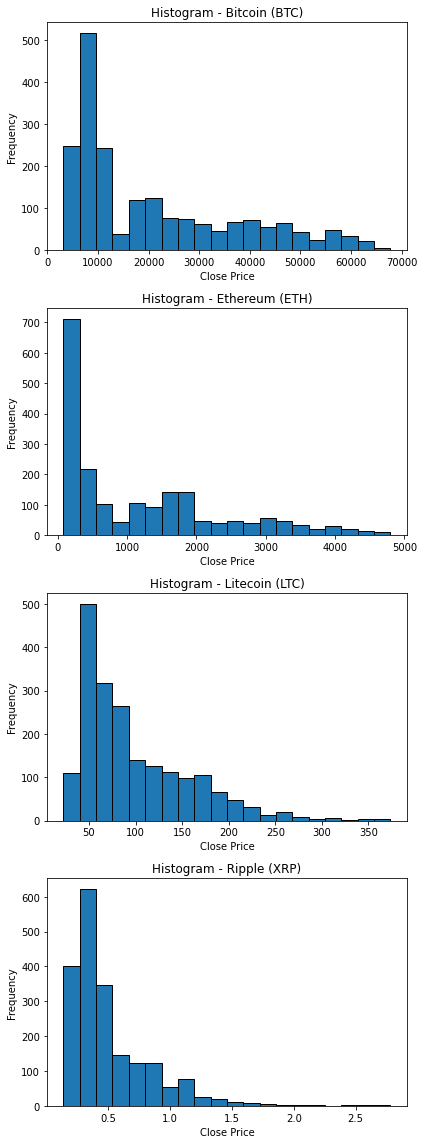

In [13]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(dtf_list), ncols=1, figsize=(6, 4 * len(dtf_list)))

# Plot histograms for each DataFrame
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    axes[i].hist(dtf['Close'], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram - {name}')
    axes[i].set_xlabel('Close Price')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Here we can see histograms of the target variable of the close price. According to the histograms, all cryptocurrency have a `Right Tail` which indicate the presence of higher closing price, which could represent outliers or data points that are much larger than the median or represents the peaks that the cryptocurrencies have reached (of which there are probably not many). </br> 

**b. Build meaningful data visualizations and Time Series Analysis:**</br>
* Plot the daily closing prices for each cryptocurrency over the entire period.
* Examine trends, seasonality, and volatility.

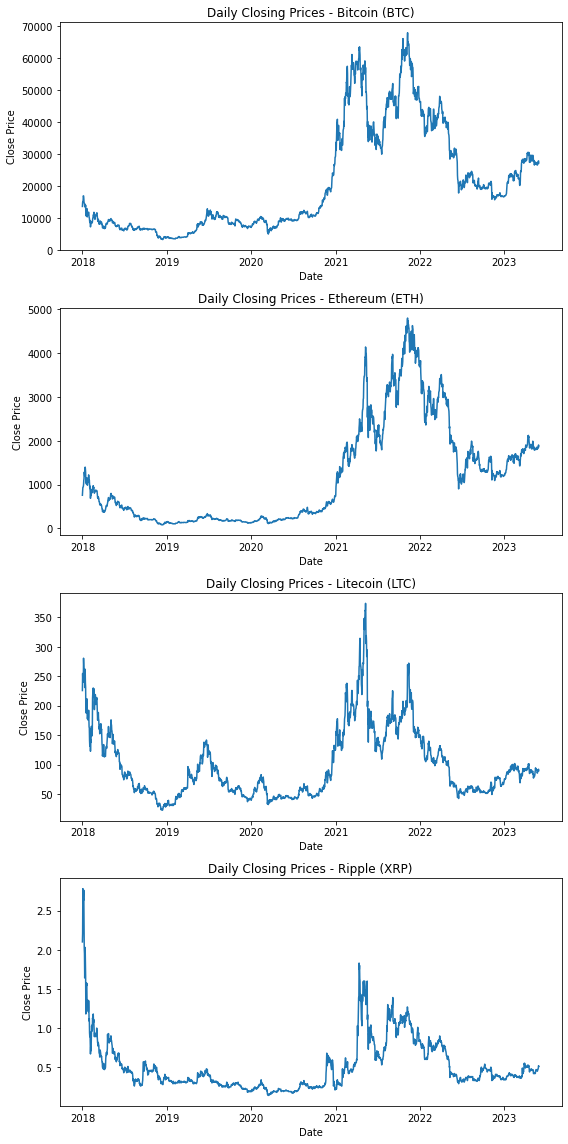

In [14]:
# Convert 'Date' column to datetime format
for dtf in dtf_list:
    dtf['Date'] = pd.to_datetime(dtf['Date'], format='%m/%d/%y')

# Set up subplots
fig, axes = plt.subplots(nrows=len(dtf_list), ncols=1, figsize=(8, 4 * len(dtf_list)))  # Adjust figsize as needed

# Plot daily closing prices for each cryptocurrency
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    sns.lineplot(x=dtf['Date'], y=dtf['Close'], ax=axes[i])
    axes[i].set_title(f'Daily Closing Prices - {name}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Close Price')

plt.tight_layout()
plt.show()

In general, we can see that the value of Bitcoin and Ethereum has increased over the years and in contrast the values of Litecoin and Ripple are decreasing as time goes by.

We can see that in the first 3 years (between 2018 till 2021) the volatility Bitcoin was low so we can infer that the trend was more stable and this could be interpreted as a period of relative market calm and more predictability. We can also add that the risk in that time was much lower because it's value is stable for a long time. After those years we can see that there is high jump and wider fluctuations which indicates higher volatility.

We can see that the behavior of Ethereum is very similar to the behavior of Bitcoin over those 5 years.

Regarding Litecoin we can see much more volatility - there are more ups and downs. We can see that it started with a high value and through the years its value is even lower than where the samples started.

for Ripple we can see a similar behvior it started with a high value and ends with much lower value; But there are less fluctuations and it's volatility between the middle of 2018 till 2021 is much stable.

**c. Correlation Analysis:** </br>
* Calculate and visualize the correlation between the target feature - close price to the other features for each cryptocurrency, note the high correlations (>0.99) between the close price to the open, high, low and close features in all the cryptocurrencies:

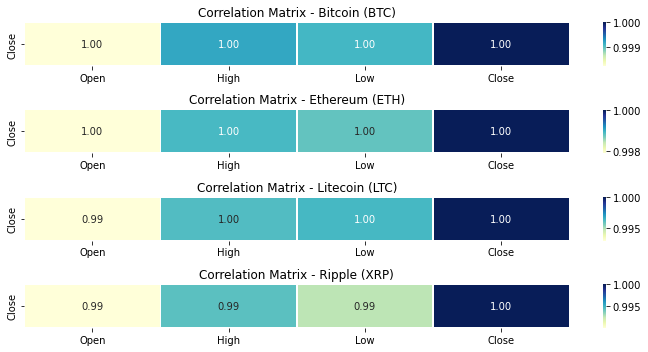

In [15]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(dtf_list), ncols=1, figsize=(10, 5))  # 1 row, 4 columns

# Calculate and visualize correlation matrices for each cryptocurrency
for i, (dtf, name) in enumerate(zip(dtf_list, dtf_names)):
    correlation_matrix = dtf.corr(method="pearson").loc[["Close"]]
    
    # Create a heatmap for the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax=axes[i])    
    
    axes[i].set_title(f'Correlation Matrix - {name}')

plt.tight_layout()
plt.show()

### 4. Benchmark Pipeline and Some Improvmenet:

In the last submission I created a Gradient Boosting Machine model by using XGBoost library and after examine the findings of the initial model - the model was improved and instead of using MAE as Evaluation Metrics I decided to use PMAE because of it abilitiy to deal with different cryptocurrencies with varying price ranges especially if we want to achieve investment analysis. Additionally I implement a 10-fold cross-validation process for evaluating model performance.

Just reminding that the Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual values. It provides an indication of how well the model is performing in terms of accuracy.

The formula for MAE is:</br>

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

where:
- $n$ is the number of observations.

- $y_i$ is the actual value.

- $\hat{y}_i$ is the predicted value.


In general terms:
- A lower MAE indicates that the model's predictions are, on average, closer to the actual values.
- A higher MAE suggests that there is more variability between the predicted and actual values, indicating lower accuracy.

So, we can infer that a lower Mean Absolute Error values, means that a smaller MAE is desirable as it indicates better predictive performance of the model on the given dataset.</br>

And Percentage Mean Absolute Error (PMAE) is a metric used to evaluate the accuracy of a regression model. It measures the average percentage difference between the predicted and actual values. PMAE is calculated as follows:

$PMAE = \text{mean}\left( \left| \frac{\text{actual} - \text{predicted}}{\text{actual}} \right| \times 100 \right)\%$

where:
- For each pair of actual and predicted values, the formula calculates the absolute error percentage: $ \left| \frac{\text{actual} - \text{predicted}}{\text{actual}} \right| \times 100 \% $
- This calculation is done for each pair of actual and predicted values across the entire test set.
- Once the absolute percentage error is calculated for each value, the formula computes the mean (average) of all these absolute percentage errors.

Lower values of PMAE indicate that the model's predictions are closer to the actual values, suggesting better model performance.

I also add a calculation of volatility metric which is acoording to the study "An Empirical Study of Volatility in Cryptocurrency Market", volatility significantly impacts the choice of cryptocurrency by influencing risk management strategies, investment decisions, market perception, and market efficiency. Investors must carefully consider the volatility of cryptocurrencies when evaluating their investment options and developing appropriate investment strategies.

In [16]:
initial_results = cpa.run_initial_model(dtf_list, dtf_names)


Comparison Across Cryptocurrencies:
Cryptocurrency  MAE             PMAE            Cross-Validation MAE      Cross-Validation PMAE
Bitcoin (BTC)   354.3503        1.7208%         327.2383                  1.5852%             
Ethereum (ETH)  25.9303         2.1928%         23.7619                   1.9994%             
Litecoin (LTC)  2.0587          1.9178%         2.1740                    2.2106%             
Ripple (XRP)    0.0108          1.9480%         0.0124                    2.4284%             


#### Bitcoin (BTC):
1. **MAE on Test Set: 354.35**
</br> The Mean Absolute Error (MAE) of 354.35 indicates the average absolute difference between the predicted and actual closing prices on the test set. In this context, it means that, on average, the model's predictions deviate by approximately 354.35 units from the actual values.
    
2. **PMAE on Test Set: 1.72%**
</br>The Percentage Mean Absolute Error (PMAE) of 1.72% represents the average absolute percentage difference between the predicted and actual closing prices on the test set. It implies that, on average, the model's predictions have a percentage error of 1.72%.
3. **Cross-Validation MAE: 327.24**
</br>The Cross-Validation MAE of 327.24 is the average MAE across 10 folds in the cross-validation process. It provides a more robust assessment of the model's generalization performance. This value is slightly lower than the MAE on the test set.
4. **Cross-Validation PMAE: 1.59%**
</br>The Cross-Validation PMAE of 1.59% is the average PMAE across 10 folds in the cross-validation process. It gives an average percentage error across different subsets of the data, indicating the model's consistency. This value is slightly lower than the PMAE on the test set.
5. **Volatility on Test Set: 627.91**
</br>The Volatility of 627.91 represents the degree of variation in Bitcoin prices on the test set. Higher volatility suggests larger price fluctuations.

#### Ethereum (ETH):
1. **MAE on Test Set: 25.93**
</br>The Mean Absolute Error (MAE) of 25.93 indicates the average absolute difference between the predicted and actual closing prices on the test set. It suggests that, on average, the model's predictions deviate by approximately 25.93 units from the actual values.
2. **PMAE on Test Set: 2.19%**
</br>The Percentage Mean Absolute Error (PMAE) of 2.19% represents the average absolute percentage difference between the predicted and actual closing prices on the test set. It implies that, on average, the model's predictions have a percentage error of 2.19%.
3. **Cross-Validation MAE: 23.76**
</br>The Cross-Validation MAE of 23.76 is the average MAE across 10 folds in the cross-validation process. It provides a more robust assessment of the model's generalization performance.
4. **Cross-Validation PMAE: 2.00%**
</br>The Cross-Validation PMAE of 2.00% is the average PMAE across 10 folds in the cross-validation process. It gives an average percentage error across different subsets of the data, indicating the model's consistency.
5. **Volatility on Test Set: 50.55**
</br>The Volatility of 50.55 represents the degree of variation in Ethereum prices on the test set. Higher volatility suggests larger price fluctuations.

#### Litecoin (LTC):
1. **MAE on Test Set: 2.06**
</br>The Mean Absolute Error (MAE) of 2.06 indicates the average absolute difference between the predicted and actual closing prices on the test set for Litecoin. It suggests that, on average, the model's predictions deviate by approximately 2.06 units from the actual values.
2. **PMAE on Test Set: 1.92%**
</br>The Percentage Mean Absolute Error (PMAE) of 1.92% represents the average absolute percentage difference between the predicted and actual closing prices on the test set for Litecoin. It implies that, on average, the model's predictions have a percentage error of 1.92%.
3. **Cross-Validation MAE: 2.17**
</br>The Cross-Validation MAE of 2.17 is the average MAE across 10 folds in the cross-validation process for Litecoin. It provides a more robust assessment of the model's generalization performance.
4. **Cross-Validation PMAE: 2.21%**
</br>The Cross-Validation PMAE of 2.21% is the average PMAE across 10 folds in the cross-validation process for Litecoin. It gives an average percentage error across different subsets of the data, indicating the model's consistency.
5. **Volatility on Test Set: 3.85**
</br>The Volatility of 3.85 represents the degree of variation in Litecoin prices on the test set. Higher volatility suggests larger price fluctuations.

#### Ripple (XRP):
1. **MAE on Test Set: 0.01**
</br>The Mean Absolute Error (MAE) of 0.01 indicates the average absolute difference between the predicted and actual closing prices on the test set for Ripple (XRP). It suggests that, on average, the model's predictions deviate by approximately 0.01 units from the actual values.
2. **PMAE on Test Set: 1.95%**
</br>The Percentage Mean Absolute Error (PMAE) of 1.95% represents the average absolute percentage difference between the predicted and actual closing prices on the test set for Ripple (XRP). It implies that, on average, the model's predictions have a percentage error of 1.95%.
3. **Cross-Validation MAE: 0.012**
</br>The Cross-Validation MAE of 0.012 is the average MAE across 10 folds in the cross-validation process. It provides a more robust assessment of the model's generalization performance for Ripple (XRP).
4. **Cross-Validation PMAE: 2.43%**
</br>The Cross-Validation PMAE of 2.43% is the average PMAE across 10 folds in the cross-validation process. It gives an average percentage error across different subsets of the data, indicating the model's consistency for Ripple (XRP).
5. **Volatility on Test Set: 0.019**
</br>The Volatility of 0.019 represents the degree of variation in Ripple (XRP) prices on the test set. Higher volatility suggests larger price fluctuations. 

 ### 5. Improve the ML Pipeline:
 
1. **Perform Better Feature Engineering and Extraction:**
     - <u>Create new features in addition to analyzing the features in the dataset:</u>
         </br>As mention before, with the target variable close we can Calculate:
        - *Daily Returns* which helps to understand the daily performance of the cryptocurrency and can be used to analyze volatility.
        - *Moving Averages* which smooths out price fluctuations and identify trends in the close price.
        - *Relative Strength Index (RSI)* it can help identify overbought or oversold conditions.
     - <u>Normalizing the metrics:</u> MAE, PMAE, Cross-Validation MAE, Cross-Validation PMAE and volatility for making comparisons across the different cryptocurrencies.
         </br>***Why using the approach of Normalization?***
        - *Different Scales:* The calculated metrics may be on different scales, making it challenging to compare them directly.
        - *Improved Comparisons:* Normalizing the values brings them to a common scale (e.g., 0 to 1), allowing to make better comparisons between the different metrics and across the different cryptocurrencies.
        - *Identify Relative Performance:* Normalization allows to understand how each cryptocurrency performs relative to the others in terms of the different metrics.
    </br>We will use **Min-Max normalization** to scale the values of the different metrics to a common range (usually between 0 and 1), which will allow us to compare the results across different cryptocurrencies more easily. 
    Min-Max normalization adjusts the values based on the minimum and maximum values of the entire set of results. </br>The formula for Min-Max normalization:</br>
    $ \text{Normalized Value} = \frac{\text{Value} - \text{Min Value}}{\text{Max Value} - \text{Min Value}} $

            * Once all the results are normalized, we can easily compare the performance of different cryptocurrencies across the different metrics.
            * Look for patterns in the data such as cryptocurrencies that perform consistently well across all metrics or particular cryptocurrencies that excel in specific metrics.</br>
---------------------------------------------------------------------
2. **Implement a Better ML Model:**
    - <u>Use Model Selection Techniques:</u>
        - Experiment with hyperparameter tuning with Random Search
        - Random Search tests a random selection of hyperparameters, while Grid Search exhaustively tests all possible combinations of hyperparameters
        - These methods help identify the best set of hyperparameters for the model, potentially improving performance.</br>
        I chose to work with random search because of its benefits and they are:
            - *Exploration of Hyperparameter Space:* Random search explores a wide range of hyperparameter combinations without being constrained by any specific search strategy. This allows it to discover potentially better combinations that might be missed by other methods like grid search.
            - *Efficient Resource Utilization:* Random search does not exhaustively search all possible combinations of hyperparameters, making it more computationally efficient compared to grid search, especially for models with a large number of hyperparameters.
            - *Avoidance of Local Optima:* Random search has a higher likelihood of finding global optima or near-optimal solutions compared to grid search, which may get stuck in local optima.
            
         The combination of Random Search and Cross-Validation provides several benefits:
            - *Robustness:* Cross-validation helps assess the generalization performance of each hyperparameter combination by evaluating it on multiple subsets of the training data. This helps ensure that the selected hyperparameters generalize well to unseen data.
            - *Reduced Overfitting:* By evaluating hyperparameter combinations on multiple folds of the training data and averaging the results, cross-validation helps reduce overfitting to the training data, resulting in more reliable performance estimates.
            - *Model Selection:* Cross-validation with random search allows for the comparison of multiple models with different hyperparameter configurations. This enables the selection of the model with the best performance, leading to improved overall model quality.
        
        
---------------------------------------------------------------------
3. **Use Appropriate Statistical Evaluation Method:**
    - <u>Compare the new model's performance to the baseline</u> using the metrics MAE (Mean Absolute Error) and cross-validation MAE
    - <u>measure the quality of predictions and identify areas for improvement.</u>  
    - ** PMAE - Percentage Mean Absolute Error, may not be the most appropriate metric for comparing models since it focuses on relative error rather than absolute error. **


In [17]:
# Train the improved model on each of the four cryptocurrencies.
improved_results, normalized_metrics = cpa.run_improved_model(dtf_list, dtf_names)

Enhanced Pipeline Evaluation for Bitcoin (BTC):
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'regressor__colsample_bytree': 0.8336790626019683, 'regressor__learning_rate': 0.10272494627837837, 'regressor__max_depth': 4, 'regressor__n_estimators': 266, 'regressor__subsample': 0.8140632283992019}

Enhanced Pipeline Evaluation for Ethereum (ETH):
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'regressor__colsample_bytree': 0.8114904316006963, 'regressor__learning_rate': 0.09362840260965907, 'regressor__max_depth': 4, 'regressor__n_estimators': 119, 'regressor__subsample': 0.9172751686722711}

Enhanced Pipeline Evaluation for Litecoin (LTC):
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'regressor__colsample_bytree': 0.8380821888477412, 'regressor__learning_rate': 0.14560213789371648, 'regressor__max_depth': 3, 'regressor__n_estimators': 455, 'regressor__subsample': 0.979023199

We can see according to the comparison across cryptocurrencies that:
1. **MAE (Mean Absolute Error):**
    - Bitcoin (BTC) has the highest MAE, indicating that it has the highest average difference between actual and predicted values. This suggests that investing in Bitcoin based on the model's predictions may carry higher risk due to less accurate predictions.
    - Ripple (XRP) has the lowest MAE, implying that its predictions have the smallest average difference from the actual values. This indicates that investing in Ripple based on the model's predictions may involve lower risk compared to other cryptocurrencies.
2. **PMAE (Percentage Mean Absolute Error):**
    - Ethereum (ETH) has the highest PMAE, indicating that its predictions have the highest average percentage error relative to the actual values. This implies that investing in Ethereum based on the model's predictions may involve higher relative risk compared to other cryptocurrencies.
    - Litecoin (LTC) has the lowest PMAE, suggesting that its predictions have the smallest average percentage error relative to the actual values. This implies that investing in Litecoin based on the model's predictions may involve lower relative risk compared to other cryptocurrencies.
3. **Cross-Validation MAE and PMAE:**
    - Similar trends are observed in cross-validation MAE and PMAE, with Bitcoin generally exhibiting higher errors compared to other cryptocurrencies. This consistency reinforces the notion that Bitcoin's predictions may be less accurate and involve higher risk compared to other cryptocurrencies in the model's assessments.
    
------------------------------------------------

The results from the improved model has been normalized using Min-Max normalization. Now, each metric (MAE, PMAE, Cross-Validation MAE, Cross-Validation PMAE, and Volatility) is scaled to a range between 0 and 1.

Here's how we can interpret the normalized results:

- **Normalized MAE:** Lower values indicate better performance. A value of 0 is the lowest MAE across all cryptocurrencies, and 1 is the highest.
- **Normalized PMAE:** Similar to normalized MAE, lower values indicate better performance in terms of percentage error.
- **Normalized Cross-Validation MAE:** Lower values indicate better performance during cross-validation. This metric can give you an idea of model stability and consistency.
- **Normalized Cross-Validation PMAE:** Again, lower values indicate better performance in terms of percentage error during cross-validation.
- **Normalized Volatility:** Lower values represent less volatile cryptocurrencies.

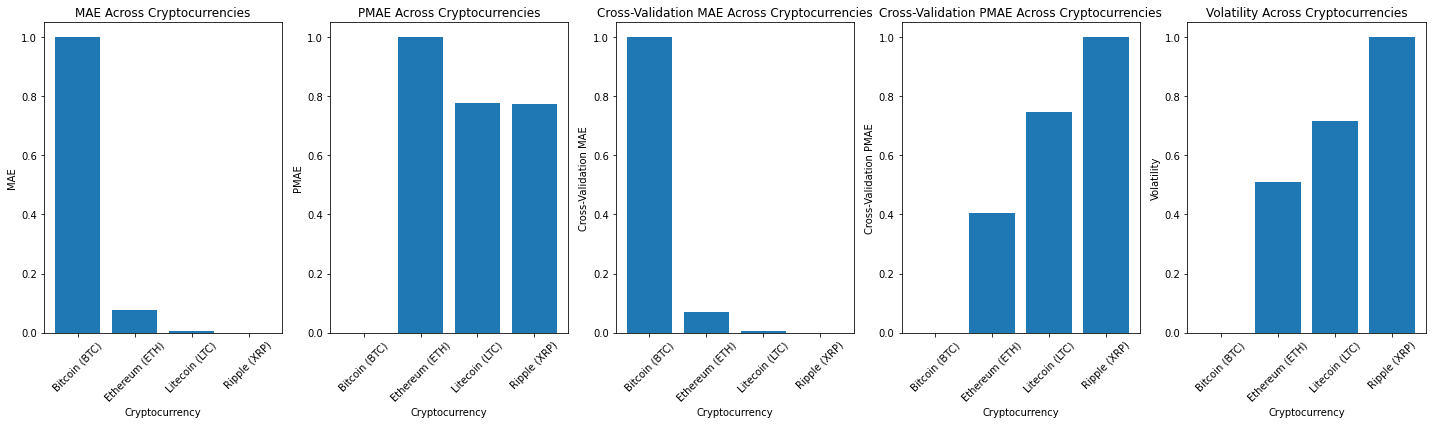

In [18]:
# Metrics to plot
metrics = ['MAE', 'PMAE', 'Cross-Validation MAE', 'Cross-Validation PMAE', 'Volatility']
cryptos = [result['Crypto'] for result in improved_results]

# Create subplots
fig, axs = plt.subplots(1, len(metrics), figsize=(20, 6))

# Plotting each metric
for i, metric in enumerate(metrics):
    axs[i].bar(cryptos, normalized_metrics[metric])
    axs[i].set_title(f'{metric} Across Cryptocurrencies')
    axs[i].set_xlabel('Cryptocurrency')
    axs[i].set_ylabel(metric)
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

According to the Bar plots and to the comparison of the normalized metrics across the cryptocurrencies, we can observe the following trends:

1. **MAE and Cross-Validation MAE:**
    Bitcoin (BTC) and Ethereum (ETH) exhibit the highest values for MAE and Cross-Validation MAE, indicating relatively higher errors in prediction compared to Litecoin (LTC) and Ripple (XRP). This suggests that the models for Bitcoin and Ethereum may have larger average differences between actual and predicted values, affecting their reliability in predicting future prices based on the "Close" feature.
2. **PMAE and Cross-Validation PMAE:**
    Ethereum (ETH) has the highest values for PMAE and Cross-Validation PMAE, suggesting that its predictions have the highest average percentage errors compared to other cryptocurrencies. This indicates that the predictions for Ethereum may have larger percentage deviations from the actual values, potentially impacting investment decisions based on risk assessment.
3. **Volatility:**
    Litecoin (LTC) and Ripple (XRP) show higher values for volatility compared to Bitcoin (BTC) and Ethereum (ETH). This indicates that Litecoin and Ripple experience larger fluctuations in prices over time, which could present both opportunities and risks for investors depending on their risk tolerance and investment strategies.

In summary, while Bitcoin and Ethereum demonstrate higher errors in prediction based on MAE and Cross-Validation MAE, Ethereum particularly stands out with higher percentage errors (PMAE and Cross-Validation PMAE). On the other hand, Litecoin and Ripple exhibit higher volatility, suggesting greater price fluctuations over time. These insights can inform investment decisions by providing a comparative analysis of returns and risk indicators across the four cryptocurrencies, helping investors assess their investment potential more effectively.

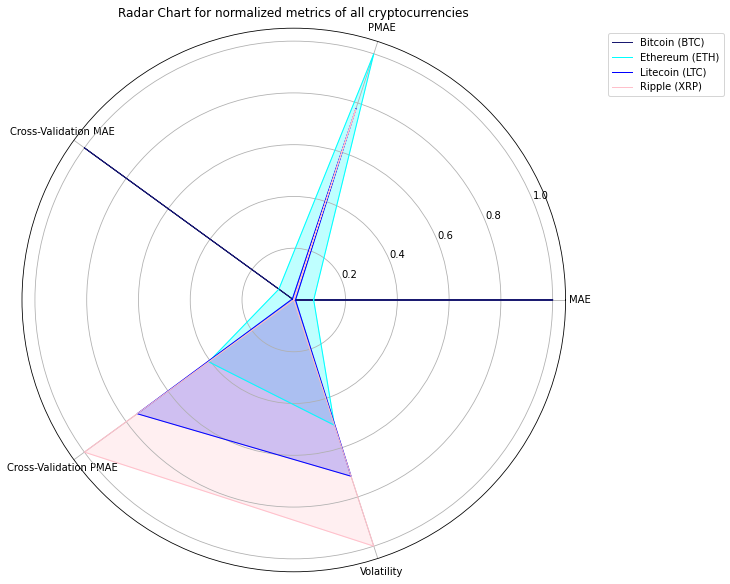

In [19]:
# Create radar chart for all cryptocurrencies
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Iterate over each cryptocurrency
for result in improved_results:
    crypto = result['Crypto']
    
    # Get color for the current cryptocurrency
    color = cpa.crypto_colors[crypto]
    
    # Extract normalized values for the current cryptocurrency
    values = [normalized_metrics[metric][improved_results.index(result)] for metric in metrics]
    
    # Plot radar chart for the cryptocurrency
    cpa.create_radar_chart(ax, crypto, metrics, values, color=color)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

The **radar chart** depicting the normalized metrics, including MAE, PMAE, Cross-Validation MAE, Cross-Validation PMAE, and Volatility, offers valuable insights into the investment potential of different cryptocurrencies. From the chart, it becomes evident that Bitcoin exhibits extreme values, predominantly clustered around zero or one, indicating a higher level of uncertainty and risk associated with investing in Bitcoin. Conversely, Ethereum and Litecoin display a more dispersed distribution of values, suggesting a relatively lower level of risk and greater confidence in investment decisions. However, Ripple's metrics primarily concentrate around a single value between one and zero, indicating significant uncertainty and diminishing investment potential. Thus, the radar chart serves as a visual tool for investors to assess and compare the risk and return profiles of various cryptocurrencies, aiding in informed investment decisions.

--------------------------------------------------

#### Evaluate Model Performance:
- Comparing the new model's performance to the baseline model using metrics MAE (Mean Absolute Error) and the Cross-Validation MAE.
- Use these metrics to measure the quality of predictions and identify areas for improvement.


In [20]:
# get the performance comparison results for the four cryptocurrencies
performance_comparison = cpa.get_performance(initial_results, improved_results)

# Print the performance comparison for each cryptocurrency
for result in performance_comparison:
    print(f"Performance Comparison for {result['Crypto']}:")
    print(f"MAE Difference: {result['MAE Difference']:.4f}")
    print(f"Cross-Validation MAE Difference: {result['CV MAE Difference']:.4f}")
    print()

Performance Comparison for Bitcoin (BTC):
MAE Difference: -139.5738
Cross-Validation MAE Difference: -114.5240

Performance Comparison for Ethereum (ETH):
MAE Difference: -9.4167
Cross-Validation MAE Difference: -8.5873

Performance Comparison for Litecoin (LTC):
MAE Difference: -0.6103
Cross-Validation MAE Difference: -0.7148

Performance Comparison for Ripple (XRP):
MAE Difference: -0.0033
Cross-Validation MAE Difference: -0.0040



These results represent the performance differences between the initial model and the improved model for each cryptocurrency.

Specifically: </br>
1. **MAE Difference:** </br>
    This indicates the change in Mean Absolute Error (MAE) between the initial model and the improved model. A negative value indicates that the MAE decreased in the improved model compared to the initial model. For example, for Bitcoin (BTC), the MAE decreased by approximately 137.8428 units in the improved model compared to the initial model.
2. **Cross-Validation MAE Difference:** </br> Similarly, this represents the change in Cross-Validation Mean Absolute Error between the initial and improved models. Again, a negative value indicates that the Cross-Validation MAE decreased in the improved model compared to the initial model. For example, for Bitcoin (BTC), the Cross-Validation MAE decreased by approximately 116.3017 units in the improved model compared to the initial model.


In summary, these results show the improvement in model performance (in terms of MAE) achieved by the improved model compared to the initial model for each cryptocurrency.

This diagnosis that there is a marked improvement between the initial and current model in the values of MAE and the Cross-Validation MAE is crucial for assessing the investment potential in the context of predicting cryptocurrency prices based on historical "Close" values. Here's why:

1. **Accurate Predictions:** A decrease in both MAE and Cross-Validation MAE suggests that the improved model is better at predicting cryptocurrency prices based on historical data. This accuracy is essential for making informed investment decisions. If the model can better predict future price movements, investors can have more confidence in their investment strategies.
2. **Reduced Risk:** By reducing MAE and Cross-Validation MAE, the model is likely providing more reliable estimates of future price movements. This reduction in uncertainty translates to reduced investment risk. Investors can make decisions with more confidence, knowing that the model's predictions are closer to the actual prices.
3. **Enhanced Returns:** With improved prediction accuracy and reduced risk, investors may have the opportunity to achieve higher returns on their investments. More accurate predictions enable investors to capitalize on market opportunities and make timely trades to maximize profits.
4. **Strategic Decision-Making:** Understanding the performance improvements in the model allows investors to adjust their investment strategies accordingly. They can incorporate the model's predictions into their decision-making processes, such as determining entry and exit points, portfolio allocations, and risk management strategies.
5. **Competitive Advantage:** Utilizing advanced models with improved performance can provide investors with a competitive edge in the cryptocurrency market. By staying ahead of market trends and making data-driven decisions, investors can potentially outperform the market and achieve their investment goals more effectively.

This is an important part in order for us to get closer to solving our prediction problem which is to assess the investment potential by comparing returns and risk indicators over time based on the performance records of the feature "Close".

### 6. Model Analayzing

we will analyze the XGBoost model using SHAP, a framework that provides explainability for machine learning models. It uses the concept of Shapley values from cooperative game theory to attribute the contribution of each feature to the model's predictions. 

with SHAP we will understand which features have the greatest impact on the predictions and how the model arrives at its conclusions, by using:
1. **Visualize feature importance** - Identify which features have the most impact on the model's predictions.
2. **Interpret model predictions** - Understand how features affect individual predictions.
3. **Evaluate model fairness** - Assess how the model treats different groups or features

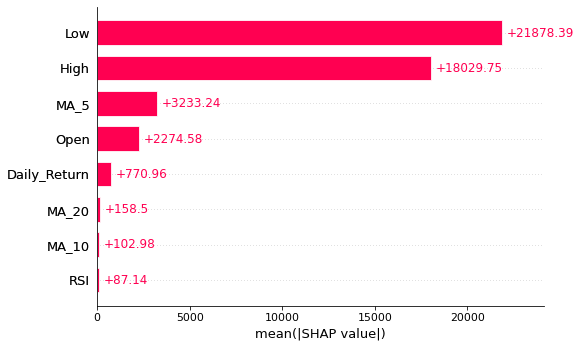

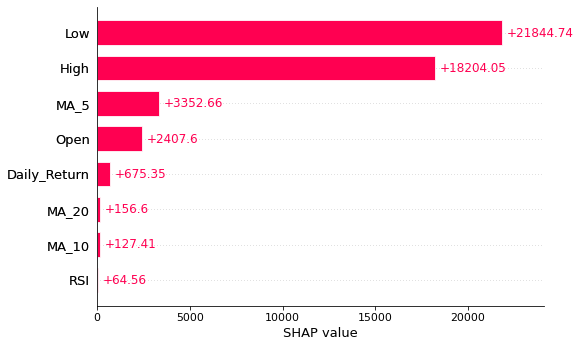

In [21]:
BTC_model, BTC_X = cpa.get_params_for_SHAP("Bitcoin (BTC)", improved_results)
# Prepare data for SHAP analysis
explainer = shap.TreeExplainer(BTC_model)
BTC_shap_values = explainer.shap_values(BTC_X)

shap.plots.bar(explainer(BTC_X))

shap.plots.bar(explainer(BTC_X)[0])

from the Bar Plots, we can infer how much each feature contributes to the model's output. Positive values indicate features that push the prediction higher.
We can see that "Low", "High", "MA_5" and "Open" have highly important to determine the results. 
The high impact of the "Low" feature on the model's predictions suggests on that changes or fluctuations in the lowest price have a substantial influence on the model's output, highlighting the importance of considering this aspect when analyzing cryptocurrency investment trends and making decisions in the market.

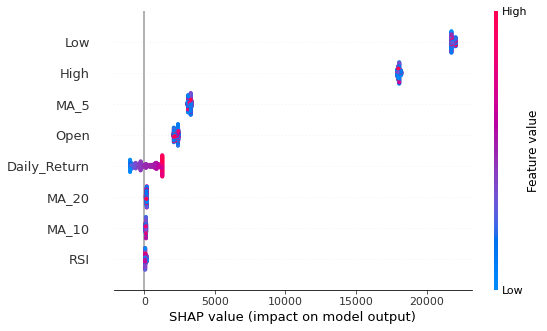

In [22]:
shap.summary_plot(BTC_shap_values, BTC_X)

The clearest conclusion from the following Summary Plot Of Bitcoin, is that the higher the value of Daily_Return, the better it affects the prediction of the model.

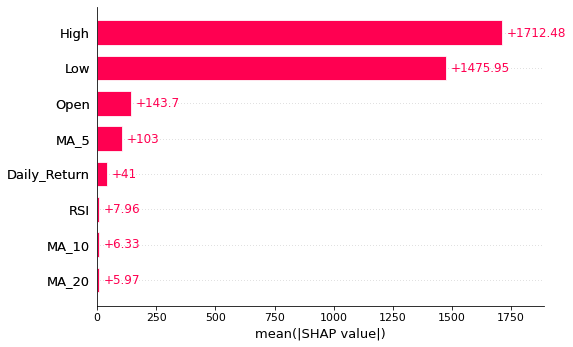

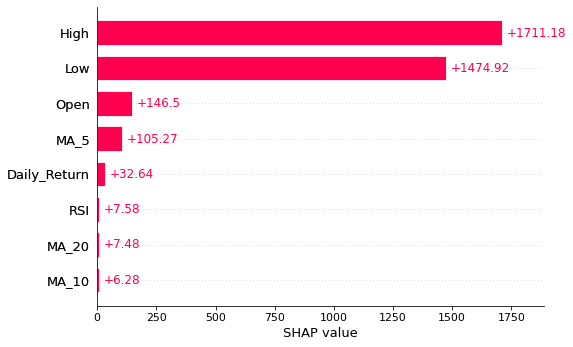

In [23]:
ETH_model, ETH_X = cpa.get_params_for_SHAP("Ethereum (ETH)", improved_results)
# Prepare data for SHAP analysis
explainer = shap.TreeExplainer(ETH_model)
ETH_shap_values = explainer.shap_values(ETH_X)

shap.plots.bar(explainer(ETH_X))

shap.plots.bar(explainer(ETH_X)[0])

Similarly to Bitcoin, the same quartet of features has the most impact on the prediction on Ethereum.
Only here the "High" feature has the most impact which implies that variations or movements in the highest price have a substantial effect on the model's predictions, underlining the importance of considering this factor when evaluating cryptocurrency investment trends and devising investment strategies. 

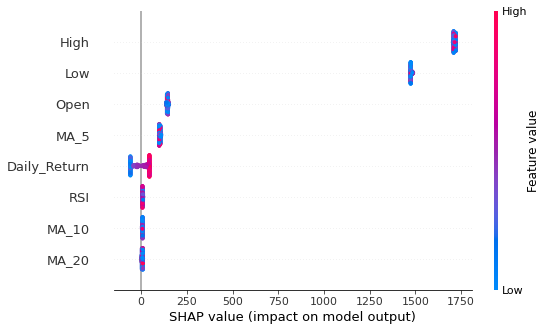

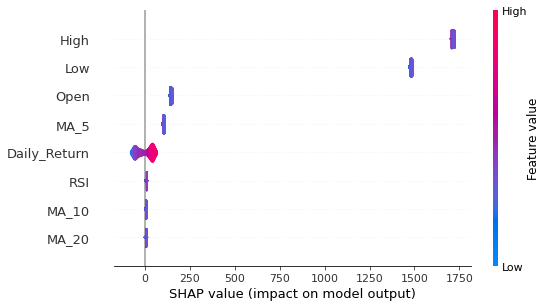

In [30]:
shap.summary_plot(ETH_shap_values, ETH_X)

We can say the same conclusion also about the model prediction on the Ethereum dataset that the higher the value of Daily_Return, the better it affects the prediction of the model.
In addition, we can infer that because the test values of "Low" and "High" are higher than the rest it affects the model results more.

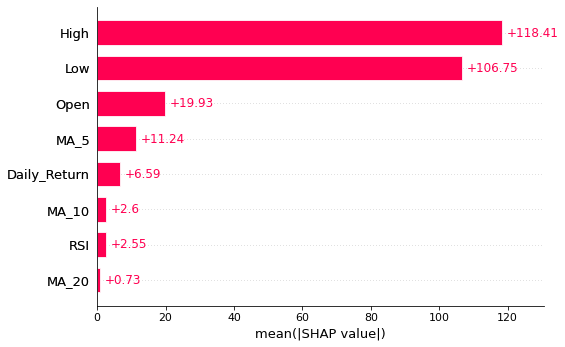

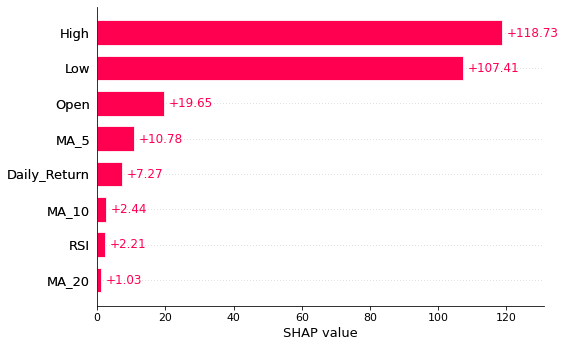

In [25]:
LTC_model, LTC_X = cpa.get_params_for_SHAP("Litecoin (LTC)", improved_results)
# Prepare data for SHAP analysis
explainer = shap.TreeExplainer(LTC_model)
LTC_shap_values = explainer.shap_values(LTC_X)

shap.plots.bar(explainer(LTC_X))

shap.plots.bar(explainer(LTC_X)[0])

we can see that the model prediction on Litcoin is most affected by the values of "High" and "Low" at almost the same level, which emphasizes that it can be concluded that the changes between these values and the differences between them are the ones that use the model the most.

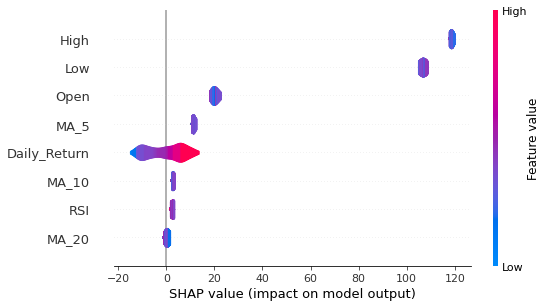

In [31]:
shap.plots.violin(LTC_shap_values, LTC_X)

I used the violin plot as the summery plot on the model results on the Litecoin dataset because we can implies from it that most of the values of each feature excpet "Daily_Return" are in the same limited range so although "High", "Low" and "Open" are the most sgnificant the "Daily_Return" עives more values and you can actually rely on it more because its range is more diverse than them.

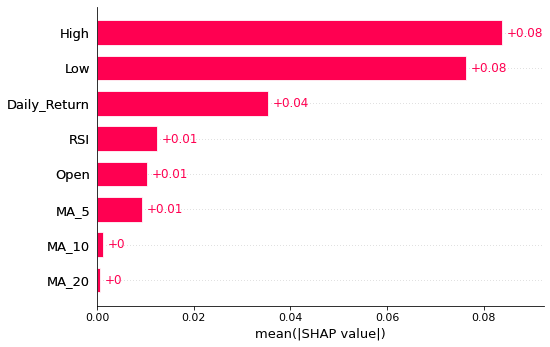

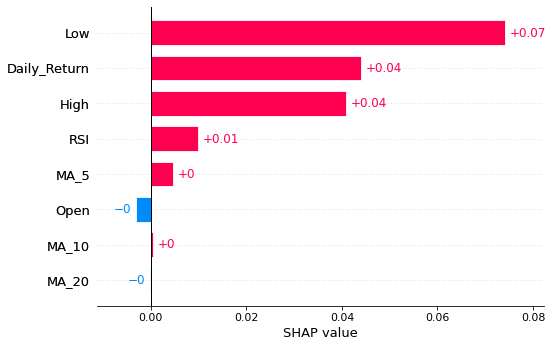

In [27]:
XRP_model, XRP_X = cpa.get_params_for_SHAP("Ripple (XRP)", improved_results)
# Prepare data for SHAP analysis
explainer = shap.TreeExplainer(XRP_model)
XRP_shap_values = explainer.shap_values(XRP_X)

shap.plots.bar(explainer(XRP_X))

shap.plots.bar(explainer(XRP_X)[0])

We can see according to the two Bar plots that "Low" is the most sgnificant feture, But the "Daily_Return" have an influnce on the model as well, which implies that a model manages to predict the closing value with a good approximation, which will prove that there is less risk in investing in Ripple cryptocurrency.

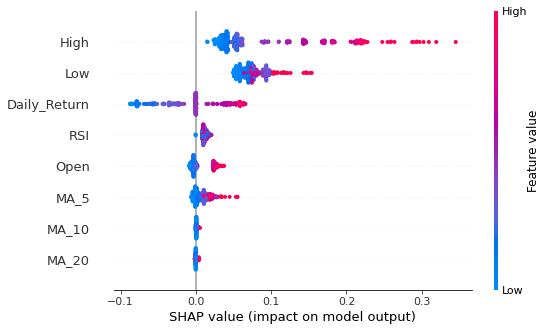

In [28]:
shap.summary_plot(XRP_shap_values, XRP_X)

We can see according to the summery plot of Ripple, that there is more distribution of the test values of each of the features and that the more the values are higher it contributes to the model's output. 

### 7. Summery

In this analysis of a dataset comprising four cryptocurrencies: Bitcoin (BTC), Ethereum (ETH), Litecoin (LTC) and Ripple (XRP).
I focused on the significance of the closing value, which serves as the target variable for addressing the prediction problem which was to assess the investment potential by comparing returns and risk indicators over time based on the performance records of the feature "Close" of those four cryptocurrencies.
By exploring various metrics derived from the closing value, I aimed to gain insights into the potential of these cryptocurrencies.
Employing XGBoost, I developed a predictive model that leverages both existing and new features to forecast the closing value.
Through a comparison of the initial and improved models based on metrics like Mean Absolute Error (MAE) and cross-validation MAE, I demonstrated the enhancement achieved in predictive accuracy.
Additionally, I examined the model results across different metrics and visualizations.

Notably, while Bitcoin stands as a prominent cryptocurrency, the analysis reveals that smaller coins like Litecoin and Ripple exhibit greater stability and potentially more lucrative investment prospects over time. Conversely, Ethereum presents a slightly higher risk, albeit with promising and stable outcomes, making it a viable option for investors seeking higher returns.

### 8. Reference to external resources

- [PREDICTING FUTURE CRYPTOCURRENCY INVESTMENT TRENDS BY CONJOINT ANALYSIS](https://dergipark.org.tr/en/pub/jefa/article/506047) by Nurgun Komsuoglu Yilmaz and Hulya Boydas Hazar 

- [10 Best Cryptocurrencies To Invest In April 2024](https://www.forbes.com/advisor/in/investing/cryptocurrency/top-10-cryptocurrencies/) by Kat Tretina and John Schmidt

- [An Empirical Study of Volatility in Cryptocurrency Market](https://www.mdpi.com/1911-8074/15/11/513) by Hemendra Gupta and Rashmi Chaudhary
